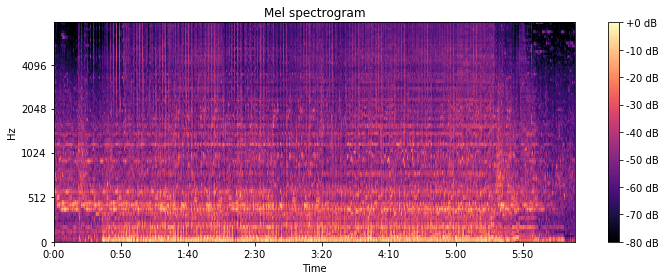

In [2]:
from __future__ import print_function
import librosa
import librosa.display
import numpy as np
import pylab
import matplotlib.pyplot as plt

filename = 'tooth.wav'

y, sr = librosa.load(filename)

librosa.feature.melspectrogram(y=y, sr=sr)

D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)


plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), 
                         y_axis='mel', fmax=8000, x_axis='time' )

plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

plt.show()
# C = librosa.feature.chroma_cqt(y=y, sr=sr)
# plt.subplot(4, 2, 5)
# librosa.display.specshow(C, y_axis='chroma')
# plt.colorbar()
# plt.title('Chromagram')
# plt.show()

save_path = "save_path_here"
# fig.subplots_adjust(bottom = 0)
# fig.subplots_adjust(top = 1)
# fig.subplots_adjust(right = 1)
# fig.subplots_adjust(left = 0)
# fig.savefig(save_path, bbox_inches='tight', transparent=True, pad_inches=0)
plt.close()

In [3]:
import os
from os import listdir
from os.path import isfile, join

# Directory where the test set is stored
testAudio = '.\gtzan\_test'
# Directory where the training set is stored
trainAudio = '.\gtzan\_train'
validateAudio = '.\gtzan\_validation'


# Creates directories to store spectrograms
def createDirectories():
    os.makedirs('./specs/_train/classical', exist_ok=True)
    os.makedirs('./specs/_train/hiphop', exist_ok=True)
    os.makedirs('./specs/_train/jazz', exist_ok=True)
    os.makedirs('./specs/_train/metal', exist_ok=True)
    os.makedirs('./specs/_train/reggae', exist_ok=True)
    os.makedirs('./specs/_train/pop', exist_ok=True)
    os.makedirs('./specs/_test', exist_ok=True)


# Returns genre of audio file if genre name is found in filename
def findGenre(filename):
    genres = ['classical', 'hiphop', 'jazz', 'metal', 'reggae', 'pop']
    for genre in genres:
        if genre in filename:
            return genre
    raise ValueError("One or more files is not labeled with a valid genre")
        
    
def createSpectrograms(inputFolder, test=False, train=False):
    if (not test and not train) or (test and train):
        print("Please specify if you want to create a testing or training set")
        print("Pass parameters 'test=Ture' or 'train=True'")
        return
    
# Create directories to store spectrograms
    createDirectories()
# Specify which folder to save files to    
    if test:
        destFolder = './specs/_test'
    if train:
        destFolder = './specs/_train'

# Create array of files from input folder
    getfiles = [f for f in listdir(inputFolder) if isfile(join(inputFolder,f))]
    
    for index, filename in enumerate(getfiles):
        truncFilename = filename.replace('.au', '')
        inputFilename = "{}\{}".format(inputFolder, filename)
        if train:
            genre = findGenre(filename)
            save_path = "{}/{}\{}.jpg".format(destFolder, genre, truncFilename)
        else:
            save_path = "{}\{}.jpg".format(destFolder,truncFilename)
        
        y, sr = librosa.load(inputFilename)

        librosa.feature.melspectrogram(y=y, sr=sr)

        D = np.abs(librosa.stft(y))**2
        S = librosa.feature.melspectrogram(S=D)

        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

        plt.figure(figsize=(10,4))
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max), fmax=8000)

        plt.tight_layout()
        plt.axis('off')
        plt.subplots_adjust(bottom = 0)
        plt.subplots_adjust(top = 1)
        plt.subplots_adjust(right = 1)
        plt.subplots_adjust(left = 0)
        plt.savefig(save_path, bbox_inches='tight', transparent=True, frameon=False, pad_inches=0)
        plt.close()
        
    print("DONE!")
        
        
print("Creating training set")
createSpectrograms(trainAudio, train=True)
print("Creating testing set")
createSpectrograms(testAudio, test=True)
print("\nAll finished!")

Creating training set
DONE!
Creating testing set
DONE!
\nAll finished!
